# IMDb Movies Data Analysis

This project performs Exploratory Data Analysis (EDA) on the IMDb Top 1000 Movies dataset to understand patterns in movie ratings, genre distribution, and audience preferences. The goal is to extract meaningful insights through data cleaning, analysis, and visualization using Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("imdb_top_1000.csv")

# First look
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
df.shape
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [3]:
df = df.drop(columns=['Poster_Link', 'Overview'])


In [4]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


In [5]:
# Drop rows where IMDB_Rating is missing (critical column)
df = df.dropna(subset=['IMDB_Rating'])

# Fill Meta_score with median
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())


In [6]:
df.isnull().sum()


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

#### Gross revenue is missing for several movies, likely due to incomplete reporting or non-commercial releases. Since gross revenue is not central to the current analysis, these missing values were retained and excluded only when revenue-based analysis is required.

In [7]:
top_movies = df.sort_values(
    by=['IMDB_Rating', 'No_of_Votes'],
    ascending=[False, False]
)[['Series_Title', 'Released_Year', 'IMDB_Rating', 'No_of_Votes']].head(10)

top_movies


,Series_Title,Released_Year,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,1994,9.3,2343110
1,The Godfather,1972,9.2,1620367
2,The Dark Knight,2008,9.0,2303232
3,The Godfather: Part II,1974,9.0,1129952
4,12 Angry Men,1957,9.0,689845
6,Pulp Fiction,1994,8.9,1826188
5,The Lord of the Rings: The Return of the King,2003,8.9,1642758
7,Schindler's List,1993,8.9,1213505
8,Inception,2010,8.8,2067042
9,Fight Club,1999,8.8,1854740


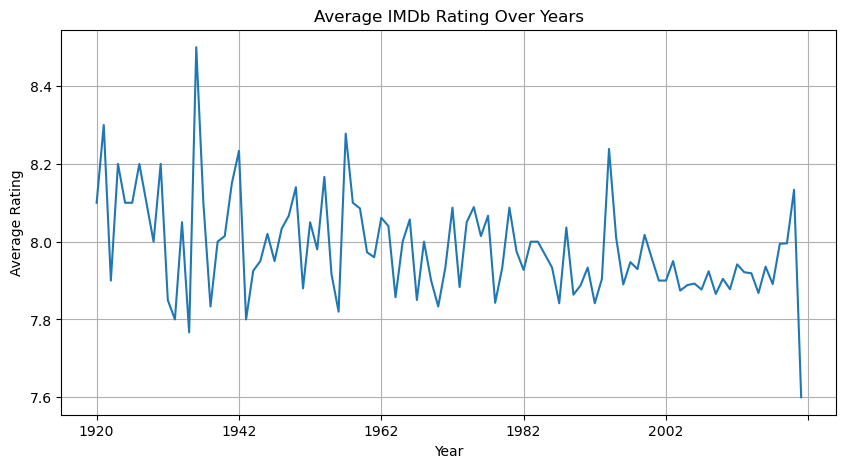

In [8]:
rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(10,5))
rating_by_year.plot()
plt.title("Average IMDb Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


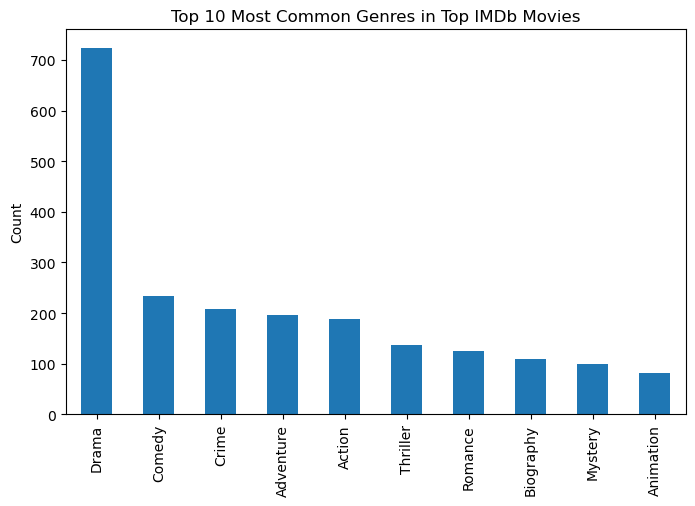

In [9]:
genres = df['Genre'].str.split(', ', expand=True)
top_genres = genres.stack().value_counts().head(10)

plt.figure(figsize=(8,5))
top_genres.plot(kind='bar')
plt.title("Top 10 Most Common Genres in Top IMDb Movies")
plt.ylabel("Count")
plt.show()


#### Drama dominates the list of top-rated IMDb movies, suggesting that story-driven films tend to receive stronger critical and audience appreciation compared to purely genre-based films.Drama dominates the list of top-rated IMDb movies, suggesting that story-driven films tend to receive stronger critical and audience appreciation compared to purely genre-based films.

## Key Insights

- Movies with both high IMDb ratings and a large number of votes appear to be more reliable indicators of audience consensus than movies with high ratings but very few votes.

- Average IMDb ratings have remained relatively stable across decades, with a slight upward trend in recent years, possibly reflecting improvements in production quality and audience targeting.

- Drama is the most frequently occurring genre among top-rated IMDb movies, suggesting that story-driven films tend to receive stronger critical and audience appreciation.


## Conclusion

In this project, exploratory data analysis was performed on the IMDb Top 1000 Movies dataset to understand rating trends, genre distribution, and characteristics of highly rated films. The analysis involved data cleaning, handling missing values with justification, and visual exploration of key patterns.

While the dataset provides valuable insights into critically acclaimed movies, the analysis is limited by missing revenue data and the subjective nature of audience ratings. Future work could involve predictive modeling or deeper analysis of factors influencing movie success.
